### Student Information
Name: 廖品亭

Student ID: 109070022

GitHub ID: kthrn070022

Kaggle name: val607

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

# PART 1

## take home exercises

## Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [9]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [10]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [11]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [12]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [13]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [14]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/al01545935/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


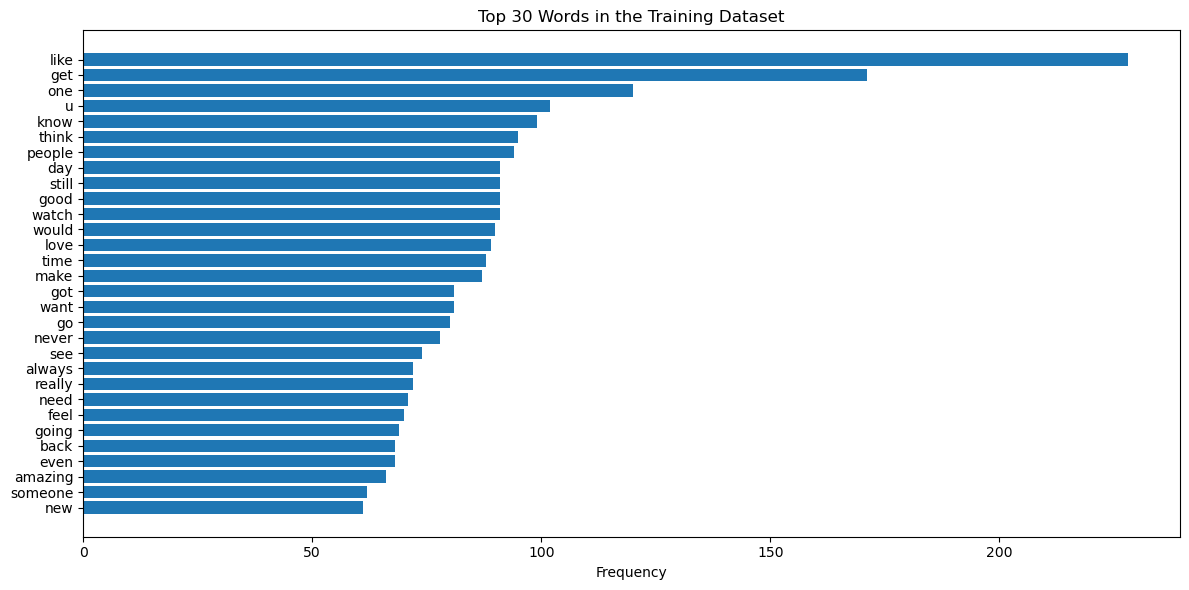

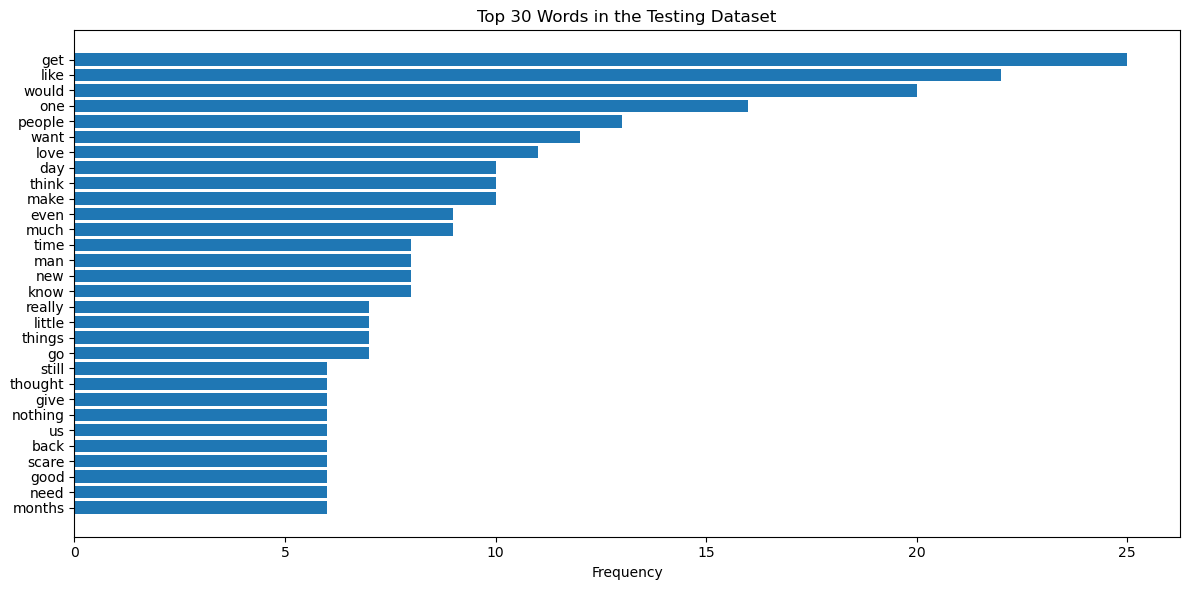

In [15]:
#tokenize the text in each data set
tokens_train = [word for text in train_df['text'] for word in text.lower().split()]
tokens_test = [word for text in test_df['text'] for word in text.lower().split()]

#remove stopwords
stop_words = set(stopwords.words('english'))
tokens_train = [word for word in tokens_train if word.isalpha() and word not in stop_words]
tokens_test = [word for word in tokens_test if word.isalpha() and word not in stop_words]

#calculate words frequence
word_freq_train = Counter(tokens_train)
word_freq_test = Counter(tokens_test)

#get top 30 words
train_30 = word_freq_train.most_common(30)
test_30 = word_freq_test.most_common(30)

#extract words for plotting
words_train, freqs_train = zip(*train_30)
words_test, freqs_test = zip(*test_30)

#create plot
plt.figure(figsize=(12, 6))
plt.barh(words_train, freqs_train)
plt.xlabel('Frequency')
plt.title('Top 30 Words in the Training Dataset')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

#create plot
plt.figure(figsize=(12, 6))
plt.barh(words_test, freqs_test)
plt.xlabel('Frequency')
plt.title('Top 30 Words in the Testing Dataset')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
#ntlk tokenizer
# build analyzers (bag-of-words)
BOW_1000 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_1000.fit(train_df['text'])

train_data_BOW_features_1000 = BOW_1000.transform(train_df['text'])

## check dimension
train_data_BOW_features_1000.shape

# observe some feature names
feature_names_1000 = BOW_1000.get_feature_names_out()
feature_names_1000[100:110]


/Users/al01545935/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [19]:
#here are some insight:
print("1. the model seems to struggle when distinguishing 'fear' and 'anger'.")
print("2. the model is most accurate with predicting 'fear', as indicated by the highest number of true positives (76) and relatively lower misclassifications compared to other emotions.")


1. the model seems to struggle when distinguishing 'fear' and 'anger'.
2. the model is most accurate with predicting 'fear', as indicated by the highest number of true positives (76) and relatively lower misclassifications compared to other emotions.


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [25]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [26]:
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [27]:
#train naive classifier
n_classifier = MultinomialNB()
n_classifier.fit(X_train, y_train)

MultinomialNB()

In [28]:
#predict on the test set
y_pred = n_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [31]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_pred) 
print(cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


In [32]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

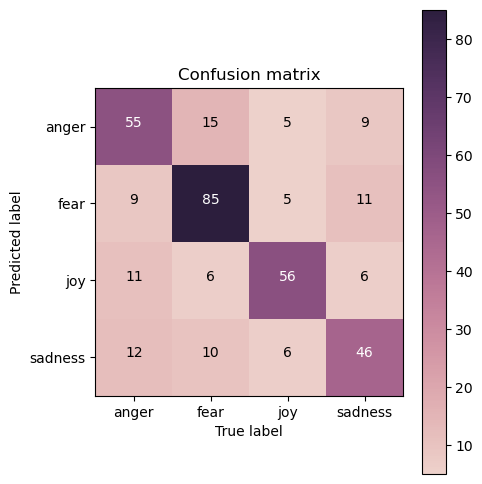

In [33]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [34]:
print("These metrics provide a more detailed view of the model's performance for each emotion class.\nIn general, it seems that the model performs reasonably well, with the highest F1-score achieved for the 'fear' class.")

These metrics provide a more detailed view of the model's performance for each emotion class.
In general, it seems that the model performs reasonably well, with the highest F1-score achieved for the 'fear' class.


---
### ** >>> Exercise 5 (Take home): **  
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.")

In [35]:
print("The assumption of the model led to different outcomes.\nNaive Bayes assumes that the features are independent given the class label.\nHowever, in real-world applications, especially in emotion classification, features may be correlated\n(e.g., certain keywords or phrases that are indicative of an emotion may often appear together).\nThis could limit the performance of the Naive Bayes model.\nIt can handel datasets where features are catagorical or when continuous features follow a known distribution.\nBy the way, it's less prone to overfitting due to their simlicity.\n")
print("Decision Trees do not assume feature independence and can capture the interaction between different features.\nThis might explain why the Decision Tree model has a better performance,\nas it can better utilize the relationships between features that are indicative of a particular emotion.\nDecision Trees can easily overfit to the training data, especially if they are not pruned correctly.\nHowever, if the Decision Tree is generalizing well as indicated by the confusion matrix,\nit suggests that the tree structure is capturing the underlying patterns in the data without fitting excessively to the noise.")

The assumption of the model led to different outcomes.
Naive Bayes assumes that the features are independent given the class label.
However, in real-world applications, especially in emotion classification, features may be correlated
(e.g., certain keywords or phrases that are indicative of an emotion may often appear together).
This could limit the performance of the Naive Bayes model.
It can handel datasets where features are catagorical or when continuous features follow a known distribution.
By the way, it's less prone to overfitting due to their simlicity.

Decision Trees do not assume feature independence and can capture the interaction between different features.
This might explain why the Decision Tree model has a better performance,
as it can better utilize the relationships between features that are indicative of a particular emotion.
Decision Trees can easily overfit to the training data, especially if they are not pruned correctly.
However, if the Decision Tree is generaliz

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [37]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.362580,1.332233,0.435158,1.282122
1,1,0.654581,0.981023,0.657061,0.926345
2,2,0.798782,0.572187,0.677233,0.816283
3,3,0.852477,0.412847,0.688761,0.793174
4,4,0.885691,0.333080,0.685879,0.841802
5,5,0.909494,0.271203,0.674352,0.893941
6,6,0.921948,0.229913,0.682997,0.926635
7,7,0.936618,0.198518,0.711816,0.974978
8,8,0.946859,0.163224,0.662824,1.090108
9,9,0.957930,0.144180,0.671470,1.089487


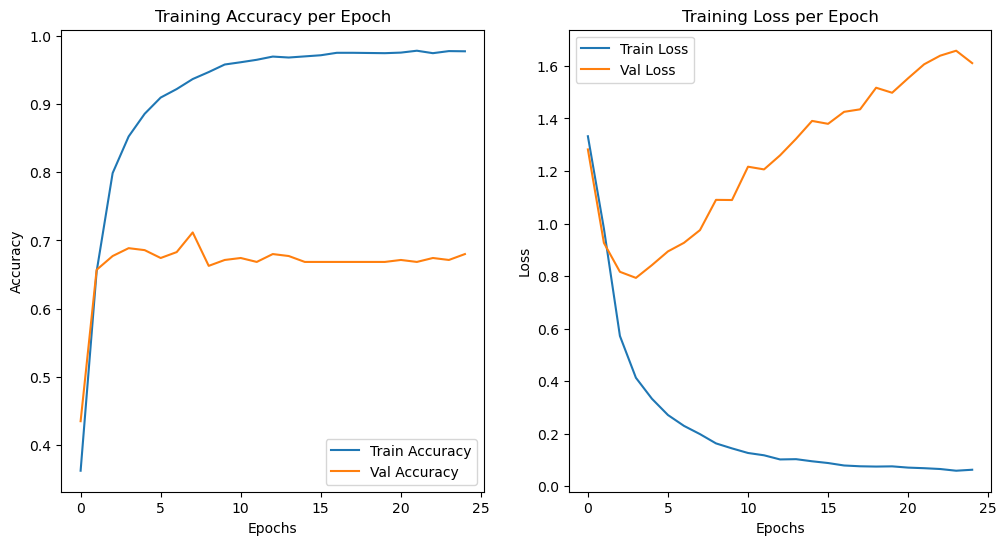

In [38]:
import matplotlib.pyplot as plt

#plot for Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_log['accuracy'], label='Train Accuracy')
plt.plot(training_log['val_accuracy'], label='Val Accuracy')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#plot for Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(training_log['loss'], label='Train Loss')
plt.plot(training_log['val_loss'], label='Val Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [39]:
print("These two charts illustrate the performance of a machine learning model over multiple training iterations (called epochs).\nTraining Accuracy Chart: The training accuracy is very high, but the validation accuracy is low and no longer improving, indicating that the model performs well on the training data but fails to generalize well to new data.\nTraining Loss Chart: The training loss decreases initially, but the validation loss starts to increase after an initial decline, suggesting that the model's performance on new data is deteriorating.\nThis situation indicates that the model is experiencing overfitting, where it learns the training data too well and fails to adapt to unseen data. Strategies to address overfitting include adding dropout, using regularization techniques, collecting more data, or simplifying the model.")

These two charts illustrate the performance of a machine learning model over multiple training iterations (called epochs).
Training Accuracy Chart: The training accuracy is very high, but the validation accuracy is low and no longer improving, indicating that the model performs well on the training data but fails to generalize well to new data.
Training Loss Chart: The training loss decreases initially, but the validation loss starts to increase after an initial decline, suggesting that the model's performance on new data is deteriorating.
This situation indicates that the model is experiencing overfitting, where it learns the training data too well and fails to adapt to unseen data. Strategies to address overfitting include adding dropout, using regularization techniques, collecting more data, or simplifying the model.


---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [41]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [42]:
import numpy as np

def sentence_vector(sentence, model):
    #filter out words that are not in the model's vocabulary
    vecs = [model[word] for word in sentence if word in model.key_to_index]
    
    #return a zero vector if no words are in the model's vocabulary
    if len(vecs) == 0:
        return np.zeros(model.vector_size)
    
    #compute the mean of the word vectors
    sentence_vec = np.mean(vecs, axis=0)
    return sentence_vec

#ensure the tokenization is done 
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x.lower()))

#apply the updated function to each tokenized sentence
train_df['sentence_vector'] = train_df['text_tokenized'].apply(lambda x: sentence_vector(x, w2v_google_model))

train_df[['id', 'text', 'sentence_vector']].head()


,id,text,sentence_vector
1946,21089,@Zen1dfabflake You are all our angelic comrades!,"[0.007114955, 0.017630441, 0.10281808, 0.19102..."
907,20050,Today was horrible and it was only half a day,"[0.016448975, 0.0054490566, 0.07498169, 0.0138..."
289,10289,Fake people irritate me,"[0.18701172, -0.03060913, 0.06817627, 0.129028..."
2724,30720,Light of day per heyday popularization backfir...,"[0.07407924, 0.005231585, -0.016649518, 0.0403..."
441,10441,can't believe Achilles killed me!,"[0.0066731772, 0.11361694, -0.061503094, 0.071..."


---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [43]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)


angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

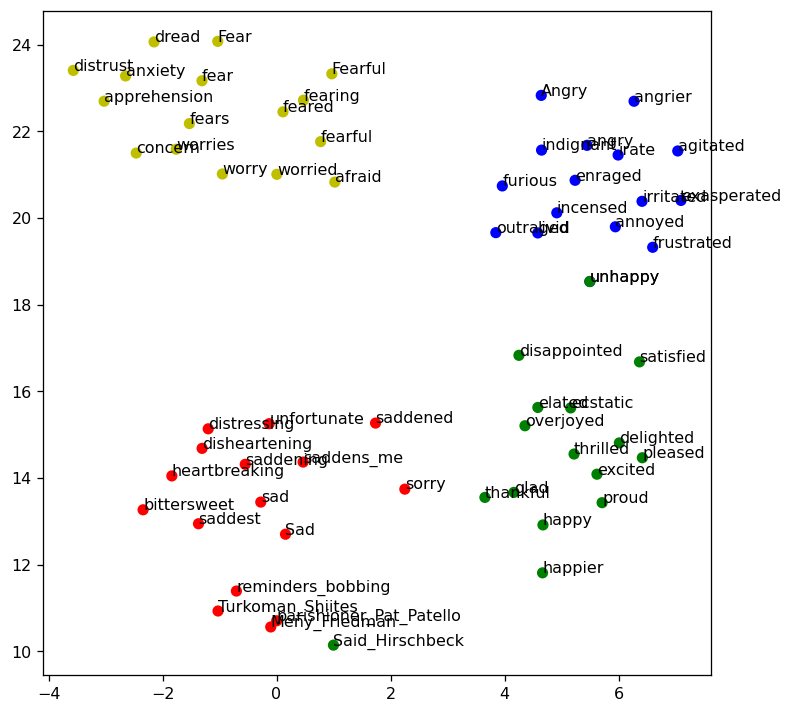

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#w2v model
model = w2v_google_model

#prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

#t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

#training
X_tsne = tsne.fit_transform(X_train)

#plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# PART 2

## Kaggle Competition

# PART 3

## Model Developing for Kaggle Competition

### Data Preparation

In [47]:
import pandas as pd

#load data set
data = pd.read_csv("/Users/al01545935/Desktop/DM2023-Lab2-Master/lab2_kaggle_data/data_identification.csv",
                         sep=",", header=None, names=["tweet_id", "identification"])
data = data.drop(0)

In [48]:
data.shape

(1867535, 2)

In [49]:
#identify testing data set
test = data[data['identification']=='test']

In [50]:
test.shape

(411972, 2)

In [52]:
#load training set
train = pd.read_csv("/Users/al01545935/Desktop/DM2023-Lab2-Master/lab2_kaggle_data/emotion.csv",
                         sep=",", header=None, names=["tweet_id", "emotion"])
train = train.drop(0)

In [53]:
train.shape

(1455563, 2)

In [54]:
#group to find distribution
train.groupby(['emotion']).count()['tweet_id']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: tweet_id, dtype: int64

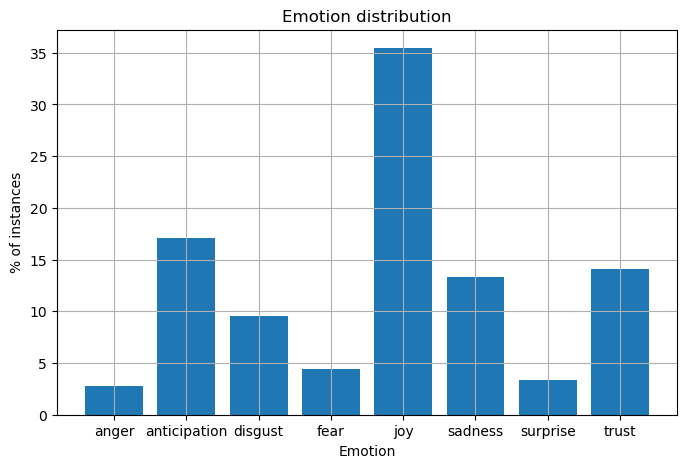

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#the histogram of the data
labels = train['emotion'].unique()
post_total = len(train)
df1 = train.groupby(['emotion']).count()['tweet_id']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(8,5))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [56]:
#load json data
import json

file_path = "/Users/al01545935/Desktop/DM2023-Lab2-Master/lab2_kaggle_data/tweets_DM.json"

json_data = []

#read the JSON data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            #parse each line as a JSON object and append it to the list
            parsed_line = json.loads(line)
            json_data.append(parsed_line)
        except json.JSONDecodeError:
            #handle invalid JSON or empty lines, if any
            pass

In [57]:
#create a dictionary to store tweet content by tweet_id
tweet_contents = {}

#iterate through the parsed JSON entries and extract content (text, hashtags, and LH) for each tweet_id
for entry in json_data:
    score = entry["_score"]
    tweet_id = entry["_source"]["tweet"]["tweet_id"]
    tweet_text = entry["_source"]["tweet"]["text"]
    hashtags = entry["_source"]["tweet"]["hashtags"]
    lh_tags = [tag for tag in tweet_text.split() if tag == "r<\s*lh\s*>"]
    
    tweet_contents[tweet_id] = {
        "score": score,
        "text": tweet_text,
        "hashtags": hashtags,
        "lh_tags": lh_tags
    }

In [58]:
import pandas as pd

#convert the 'tweet_contents' dictionary into a Pandas DataFrame
tweet_contents = pd.DataFrame.from_dict(tweet_contents, orient='index')

#reset the index to have a dedicated column for 'tweet_id'
tweet_contents.reset_index(inplace=True)
tweet_contents.rename(columns={'index': 'tweet_id'}, inplace=True)


In [59]:
tweet_contents.drop(columns=['lh_tags'], inplace=True)

In [60]:
tweet_contents

,tweet_id,score,text,hashtags
0,0x376b20,391,"People who post ""add me on #Snapchat"" must be ...",[Snapchat]
1,0x2d5350,433,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]"
2,0x28b412,232,"Confident of your obedience, I write to you, k...",[bibleverse]
3,0x1cd5b0,376,Now ISSA is stalking Tasha 😂😂😂 <LH>,[]
4,0x2de201,989,"""Trust is not the same as faith. A friend is s...",[]
...,...,...,...,...
1867530,0x316b80,827,When you buy the last 2 tickets remaining for ...,"[mixedfeeling, butimTHATperson]"
1867531,0x29d0cb,368,I swear all this hard work gone pay off one da...,[]
1867532,0x2a6a4f,498,@Parcel2Go no card left when I wasn't in so I ...,[]
1867533,0x24faed,840,"Ah, corporate life, where you can date <LH> us...",[]


In [61]:
tweet_contents["text"] = tweet_contents["text"].str.replace(r"@\w+", "", regex=True)
tweet_contents["text"] = tweet_contents["text"].str.replace(r"<\s*LH\s*>", "", regex=True)

In [62]:
#merge tweet_contents with emotion 
tweet_contents = pd.merge(tweet_contents, train[['tweet_id', 'emotion']], on='tweet_id', how='left')

### Data Preprocessing

### Tokenization & Lemmatization

In [63]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

#load the NLTK Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    #convert to lowercase
    text = text.lower()
    
    #tokenize the text
    words = nltk.word_tokenize(text)
    
    #remove stopwords
    words = [word for word in words if word not in stop_words]

    #perform lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    
    #join the words back into a string
    return ' '.join(words)

tweet_contents['preprocessed_text'] = tweet_contents['text'].apply(preprocess_text)

In [64]:
tweet_contents

,tweet_id,score,text,hashtags,emotion,preprocessed_text
0,0x376b20,391,"People who post ""add me on #Snapchat"" must be ...",[Snapchat],anticipation,people post `` add # snapchat '' must dehydrat...
1,0x2d5350,433,"As we see, Trump is dangerous to #freepress a...","[freepress, TrumpLegacy, CNN]",sadness,"see , trump dangerous # freepress around world..."
2,0x28b412,232,"Confident of your obedience, I write to you, k...",[bibleverse],NaN,"confident obedience , write , knowing even ask..."
3,0x1cd5b0,376,Now ISSA is stalking Tasha 😂😂😂,[],fear,issa stalking tasha 😂😂😂
4,0x2de201,989,"""Trust is not the same as faith. A friend is s...",[],NaN,`` trust faith . friend someone trust . puttin...
...,...,...,...,...,...,...
1867530,0x316b80,827,When you buy the last 2 tickets remaining for ...,"[mixedfeeling, butimTHATperson]",NaN,buy last 2 ticket remaining show sell .. # mix...
1867531,0x29d0cb,368,I swear all this hard work gone pay off one da...,[],NaN,swear hard work gone pay one day😈💰💸
1867532,0x2a6a4f,498,no card left when I wasn't in so I have no id...,[],NaN,card left n't idea get parcel
1867533,0x24faed,840,"Ah, corporate life, where you can date using ...",[],joy,"ah , corporate life , date using relative anac..."


In [65]:
#remove "#"
tweet_contents['preprocessed_text'] = tweet_contents['preprocessed_text'].str.replace('#', '')

### Feature Engineering

### Using Word2Vec

#### train by ourself

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec

#train Word2Vec model on tweet content
corpus = [text.split() for text in tweet_contents['preprocessed_text']]
word2vec_model = Word2Vec(corpus, vector_size=500, window=15, min_count=1, sg=1)

#function to calculate the average word2vec embedding for a tweet
def get_tweet_vector(tweet, model):
    vectors = [model.wv[word] for word in tweet if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

#create feature vectors for each tweet using Word2Vec embeddings
tweet_contents['word2vec_vector'] = tweet_contents['preprocessed_text'].apply(lambda x: get_tweet_vector(x.split(), word2vec_model))

In [77]:
#devide training and testing data set
train = tweet_contents[~tweet_contents['emotion'].isna()]

test = tweet_contents[tweet_contents['emotion'].isna()]

In [78]:
#encode the 'emotion' column into numerical values
label_encoder = LabelEncoder()
train['emotion_encoded'] = label_encoder.fit_transform(train['emotion'])

/var/folders/5t/52p04rv518v8z1dh4gywq2500000gq/T/ipykernel_61211/3818879618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['emotion_encoded'] = label_encoder.fit_transform(train['emotion'])


#### train by google

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

In [ ]:
import gensim.downloader as api

import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

In [ ]:
import numpy as np

def sentence_vector(sentence, model):
    #filter out words that are not in the model's vocabulary
    vecs = [model[word] for word in sentence if word in model.key_to_index]
    
    #return a zero vector if no words are in the model's vocabulary
    if len(vecs) == 0:
        return np.zeros(model.vector_size)
    
    #compute the mean of the word vectors
    sentence_vec = np.mean(vecs, axis=0)
    return sentence_vec

#apply the updated function to each tokenized sentence
train['sentence_vector'] = train['preprocessed_text'].apply(lambda x: sentence_vector(x, w2v_google_model))

train[['id', 'text', 'sentence_vector']].head()

### Using TF-ITF

In [ ]:
#create a TfidfVectorizer with a maximum number of features
TFIDF_5000 = TfidfVectorizer(max_features=5000)

#assuming 'corpus' is a list of text documents
train_tfidf = TFIDF_5000.fit_transform(train['preprocessed_text'])
test_tfidf = TFIDF_5000.transform(test['preprocessed_text'])

In [ ]:
#check dimension
train_tfidf.shape

In [ ]:
test_tfidf.shape

In [ ]:
train_tfidf.toarray()

### Model & Result Evaluation

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

#split the dataset into training and testing sets for model evaluation
X = np.vstack(train['word2vec_vector'])
y = train['emotion_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train a Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

#make predictions on the test set
y_train_pred = tree_model.predict(X_train)
y_pred = tree_model.predict(X_test)

In [ ]:
#calculate accuracy and F1 score on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

#calculate accuracy and F1 score on the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Training F1 Score:", train_f1_score)
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1_score)

### XGboost

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb

#split the dataset into training and testing sets
X = np.vstack(train['word2vec_vector'])
y = train['emotion_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train an XGBoost model
xgb_model = xgb.XGBClassifier(booster='gbtree',
    n_estimators=500,
    learning_rate=0.2,
    max_depth=6,
    random_state=42)

xgb_model.fit(X_train, y_train)

#make predictions on the test set
y_train_pre = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)

In [ ]:
#calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
accuracy_t = accuracy_score(y_train, y_train_pre)
f1 = f1_score(y_test, y_pred, average='weighted')
f1_t = f1_score(y_train, y_train_pre, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"Accuracy_t: {accuracy_t}")
print(f"F1-score_t: {f1_t}")

### Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb

#split the dataset into training and testing sets
X = np.vstack(train['word2vec_vector'])
y = train['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#build Random Forest model
RF_model = RandomForestClassifier(n_estimators=300, max_depth=100,random_state=42)

#training
RF_model = RF_model.fit(train_tfidf, y_train)

#predict
y_train_pred = RF_model.predict(train_tfidf)
y_test_pred = RF_model.predict(test_tfidf)
y_test_pred[:10]

In [ ]:
#calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
accuracy_t = accuracy_score(y_train, y_train_pre)
f1 = f1_score(y_test, y_pred, average='weighted')
f1_t = f1_score(y_train, y_train_pre, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"Accuracy_t: {accuracy_t}")
print(f"F1-score_t: {f1_t}")

### SVM

#### Liner

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

#split the dataset into training and testing sets
X = np.vstack(train['word2vec_vector'])
y = train['emotion_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train an SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  

svm_model.fit(X_train, y_train)

#make predictions on the test set
y_train_pred = svm_model.predict(X_train)
y_pred = svm_model.predict(X_test)

In [ ]:
#calculate accuracy and F1 score on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

#calculate accuracy and F1 score on the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Training F1 Score:", train_f1_score)
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1_score)


#### RBF

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

#split the dataset into training and testing sets
X = np.vstack(train['word2vec_vector'])
y = train['emotion_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train an SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, random_state=42) 

svm_model.fit(X_train, y_train)

#make predictions on the test set
y_train_pred = svm_model.predict(X_train)
y_pred = svm_model.predict(X_test)

In [ ]:
#calculate accuracy and F1 score on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

#calculate accuracy and F1 score on the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Training F1 Score:", train_f1_score)
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1_score)


### Keras

In [ ]:
import tensorflow as tf
import keras

train_tfidf

#standardize name (X, y) 
X_train = train_tfidf
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

#check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
#deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


In [ ]:
#I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

#input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

#1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

#2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

#output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

#create model
model = Model(inputs=[model_input], outputs=[model_output])

#loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#show model construction
model.summary()

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

#training setting
epochs = 25
batch_size = 32

#training
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

In [ ]:
#predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

### Predict Testing Set (Submission data set)

#### After training the model with various approaches, the next step is to apply the model on the testing(submission) dataset, resulting in the generation of a submission file. Here, we'll use the final method as an example: Word2Vec + XGBoost.

In [ ]:
X_test = np.vstack(test['word2vec_vector'])

In [ ]:
y_test_pred = xgb_model.predict(X_test)

In [ ]:
test['emotion_encoded'] = y_test_pred

In [ ]:
#decode the numerical values back to words
test['emotion'] = label_encoder.inverse_transform(test['emotion_encoded'])

In [ ]:
#create a new DataFrame with only 'id' and 'emotion' columns
submission_df = test[['id', 'emotion']]

In [ ]:
submission_df

In [ ]:
submission_df.to_csv('submission_1227.csv', index=False)

### Conclusion

#### Throughout the entire process, I began by carefully examining the data to understand its structure. This involved checking for potential issues such as data imbalances, handling missing values, and identifying special characters like "#", and "@". After completing the data preprocessing phase, I experimented with several methods for feature engineering and model training, striving to find the most effective combinations.

#### In the end, I opted for a Word2Vec + XGBoost approach to process the dataset, achieving a score of 0.44346 on the private leaderboard. Upon reviewing the competition experience, I came to the realization that the most critical part of this competition was, in fact, the implementation of data preprocessing steps. Notably, the removal of "#" and "@" characters led to a significant improvement in the f1-score after several iterations.